In [1]:
#import
from analysis import *
import pandas as pd

from main import main2 as modelwithflow

<span style="font-size: 30px;">Search for hyperparameter - plot</span>

- smaller best_val (validation MSE) is better model
- problem with ploting several axis so this can be result?
- summary table with sorted models (best_val)

- I tried all combinations of (totally 256 combinations):
    - d_model_list = [32, 64, 128, 256]
    - nhead_list = [1, 2, 4, 8]
    - num_layers_list = [1, 2, 3, 4]
    - dim_f_list = [64, 128, 256, 512]

In [2]:
df = pd.read_csv("plots/rep04-different-model-hyperparameters/T1_hyperprams.csv")

In [3]:
df.loc[(df['best_val'] <= 0.0025) , ['d_model', 'nhead', 'num_layers', 'dim_f', 'best_val', 'test_mse', 'test_mae']].sort_values('best_val').head(8)

,d_model,nhead,num_layers,dim_f,best_val,test_mse,test_mae
242,256,8,1,256,0.000172,0.000176,0.010684
240,256,8,1,64,0.000190,0.000247,0.011217
241,256,8,1,128,0.000204,0.000222,0.010697
179,128,8,1,512,0.000229,0.000218,0.010396
84,64,2,2,64,0.000239,0.000257,0.009671
176,128,8,1,64,0.000239,0.000264,0.012745
104,64,4,3,64,0.000266,0.000279,0.011698
96,64,4,1,64,0.000287,0.000360,0.014400


- In plot/rep05 are these plots with better resolution, so i suggest look at it from the folder (not easy to scale)

<img src="plots/rep05-something-small/parallel_all.png" width="1000">

<img src="plots/rep05-something-small/parallel_top8_zoomed.png" width="1000">

<span style="font-size: 30px;">Model Parameters number</span>

- Used function to calculate/find all internal parameters of model
- Here shown 3 models:
    - originally used model
    - best searched model
    - my actual model (top fifth)
- https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters

In [4]:
#original params
tell_me_model_params(model=TransformerModel1(d_model=128, nhead=8, num_layers=2, dim_f=256))

Total parameters in TransformerModel1(
  (input_embedding): Linear(in_features=1, out_features=128, bias=True)
  (position_encoding): PositionalEncoding()
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=256, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (head): Sequential(
    (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (1): Linear(in_features=128, out_featur

In [5]:
#Best search hyperparameters
tell_me_model_params(model=TransformerModel1(d_model=256, nhead=8, num_layers=1, dim_f=256))

Total parameters in TransformerModel1(
  (input_embedding): Linear(in_features=1, out_features=256, bias=True)
  (position_encoding): PositionalEncoding()
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=256, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (head): Sequential(
    (0): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    (1): Linear(in_features=256, out_features=1, 

In [6]:
#my actual hyperparameters
tell_me_model_params(model=TransformerModel1(d_model=64, nhead=2, num_layers=2, dim_f=64))

Total parameters in TransformerModel1(
  (input_embedding): Linear(in_features=1, out_features=64, bias=True)
  (position_encoding): PositionalEncoding()
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=64, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=64, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (head): Sequential(
    (0): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (1): Linear(in_features=64, out_features=1, bias=

- Model Size in bytes (https://stackoverflow.com/questions/71851474/how-to-find-the-size-of-a-deep-learning-model?)

In [7]:
tell_model_size(model=TransformerModel1(d_model=64, nhead=2, num_layers=2, dim_f=64))

Size: 0.218 MB


<span style="font-size: 30px;">Transformer with Flow Head</span>

thanks to library i have now head with flow, where is used probabilistic distribution using NLL (Negative log likelihood). Library handles flow.

- https://arxiv.org/abs/1605.08803
- https://arxiv.org/abs/1912.02762

- https://github.com/bayesiains/nflows - library

HeadWithFlow:
    - MAF creates invertible neural transformation, then chain them sequentially (chain of invertible transformation of distributions)
    - 

Test MSE 0.004761, MAE 0.050200


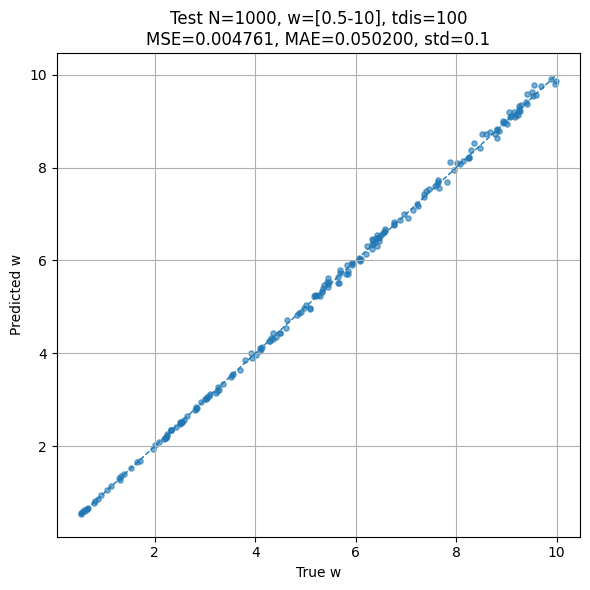

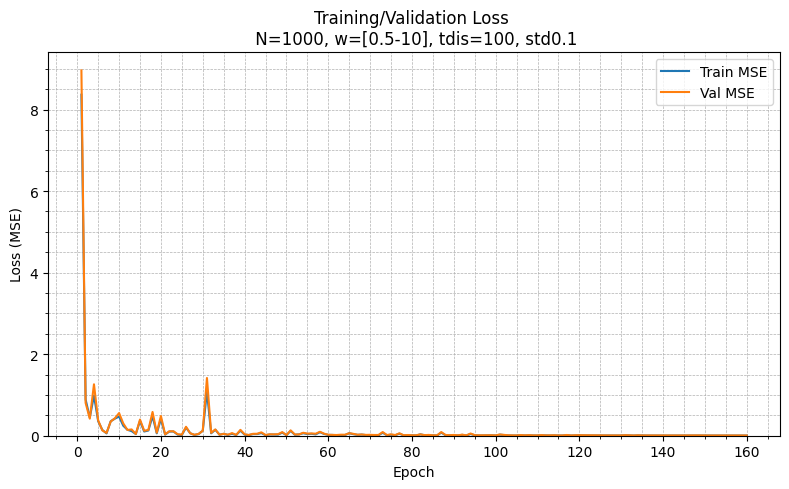

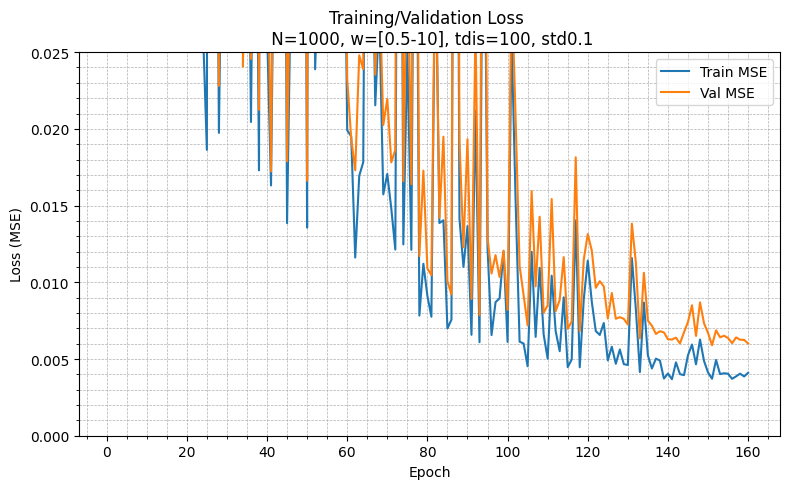

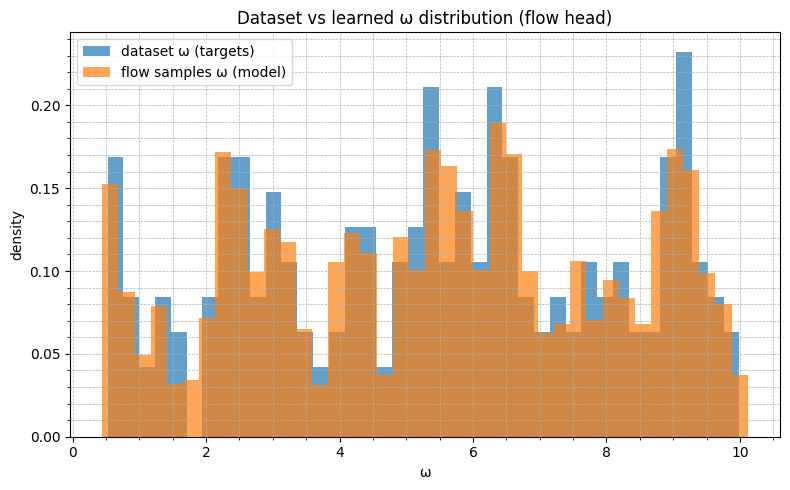

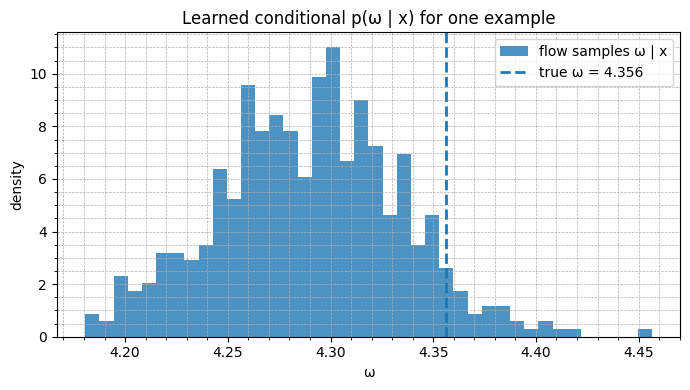

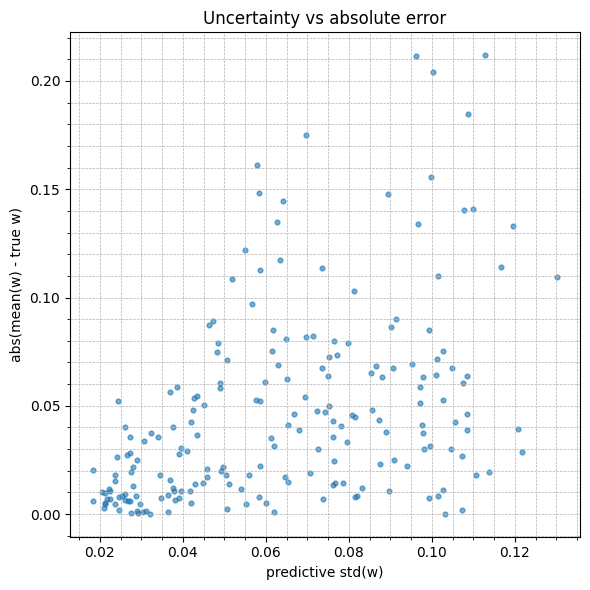

In [8]:
modelwithflow()